# **Klasifikasi Penyakit Jantung**
- **Nama:** Radya Ardi Ninang Pudyastuti
- **Dataset:** https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction


# Import Library


In [1]:
#Import library python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import drive

# Loading Data

In [2]:
#membaca dataset
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/TUGAS CODING CAMP/ML Terapan/dataset_heart_disease.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)
df

Mounted at /content/drive


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [3]:
# Memeriksa ukuran data
df.shape

(1000, 16)

# Data Preprocessing

In [4]:
#Memeriksa missing value
df.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


Terdapat missing value pada kolom 'Alcohol Intake'. nilai kosong tersebut harus dilakukan penanganan

In [5]:
#Memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [6]:
#Memeriksa nilai duplikat
df.duplicated().sum()

np.int64(0)

Tidak terdapat nilai duplikat pada dataset ini

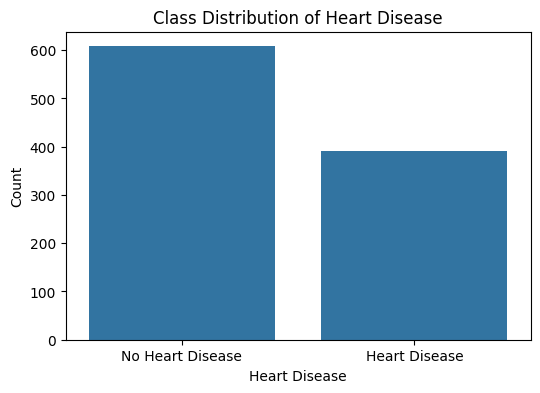

Class distribution:
 Heart Disease
0    608
1    392
Name: count, dtype: int64


In [7]:
# Checking the balance of classes (Heart Disease vs. No Heart Disease)
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df)
plt.title('Class Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

# Display the counts numerically
class_counts = df['Heart Disease'].value_counts()
print("Class distribution:\n", class_counts)

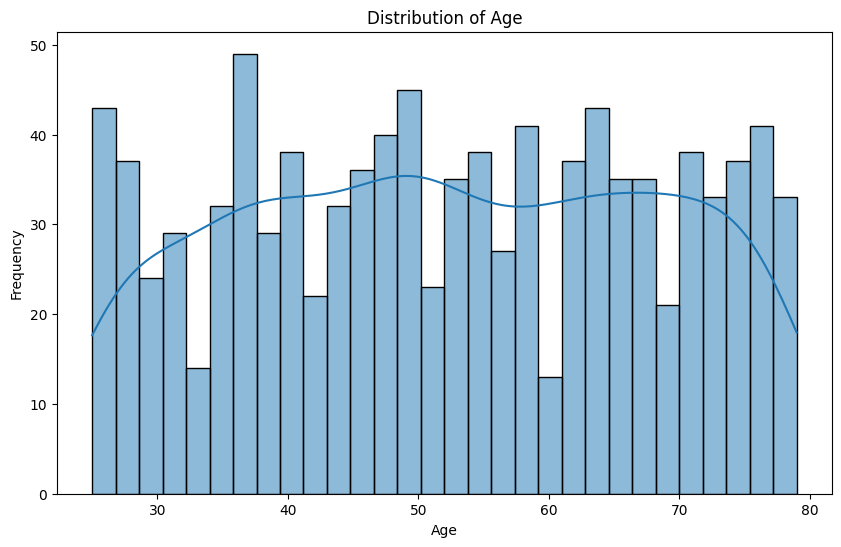

In [8]:
# visualisasi distribusi umur
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

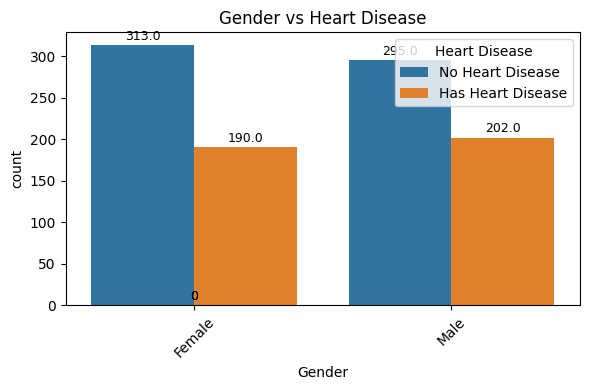

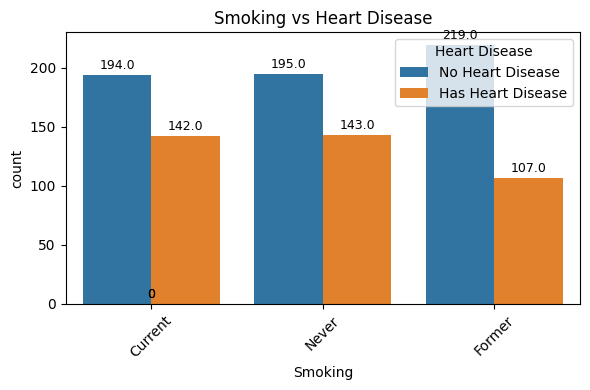

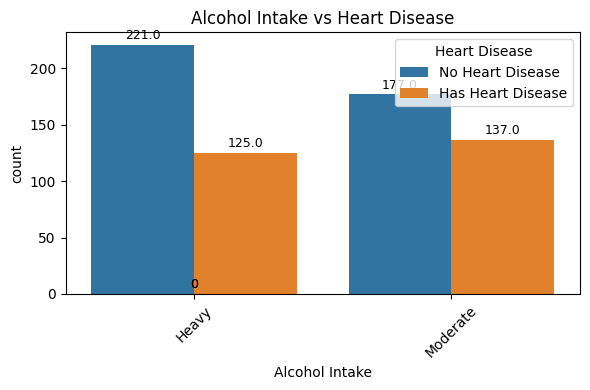

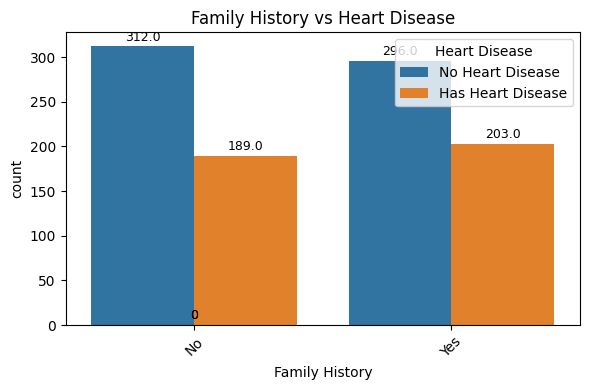

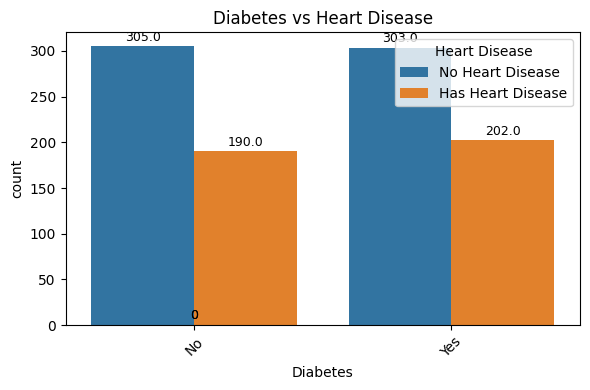

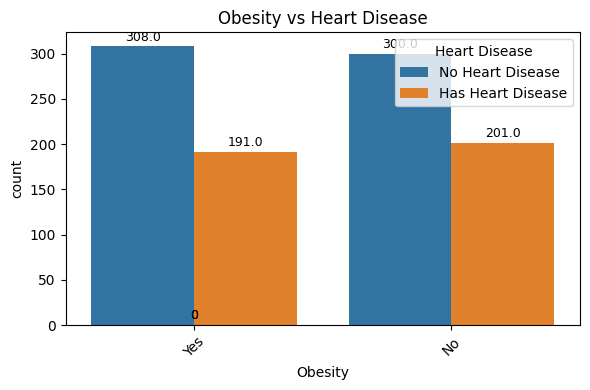

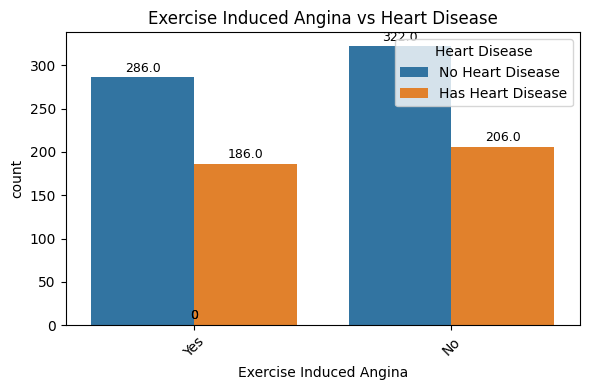

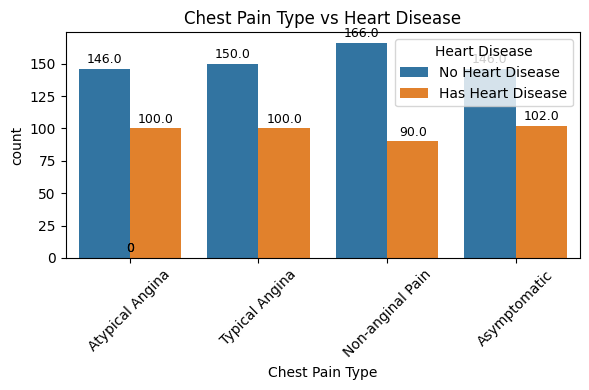

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History',
                'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']

for col in cat_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=col, hue='Heart Disease')

    # Tambahkan jumlah di atas tiap bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 2),
                    textcoords='offset points')

    # Tambahkan judul dan format
    plt.title(f'{col} vs Heart Disease')
    plt.xticks(rotation=45)

    # Ubah legenda agar jelas (0 = Tidak Sakit, 1 = Sakit)
    handles, labels = ax.get_legend_handles_labels()
    labels = ['No Heart Disease', 'Has Heart Disease']
    ax.legend(handles, labels, title='Heart Disease')

    plt.tight_layout()
    plt.show()

In [10]:
#Encoding data/mengubah data menjadi numerikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Categorical column:", categorical_cols)
print("Numerical column:", numerical_cols)

Categorical column: ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']
Numerical column: ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar', 'Heart Disease']


In [11]:
# Columns to encode
cols_to_encode = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']

# Initialize LabelEncoder
label_encoders = {}
for col in cols_to_encode:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

print("DataFrame after encoding:")
df.head()

DataFrame after encoding:


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,0,0,1,0,0,1,8,119,1,1,1
1,48,1,204,165,62,0,2,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,2,0,3,1,0,1,5,196,1,1,1
3,69,0,192,90,72,0,2,4,0,1,0,7,107,1,2,0
4,62,0,172,163,93,2,2,6,0,1,0,2,183,1,0,0


In [12]:
# Mengatasi missing value pada kolom 'Alcohol Intake' dengan nilai mean
mean_alcohol_intake = df['Alcohol Intake'].mean()
df['Alcohol Intake'].fillna(mean_alcohol_intake, inplace=True)

# Memeriksa kembali missing value setelah pengisian
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64


<ipython-input-12-9824e1493bda>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol Intake'].fillna(mean_alcohol_intake, inplace=True)


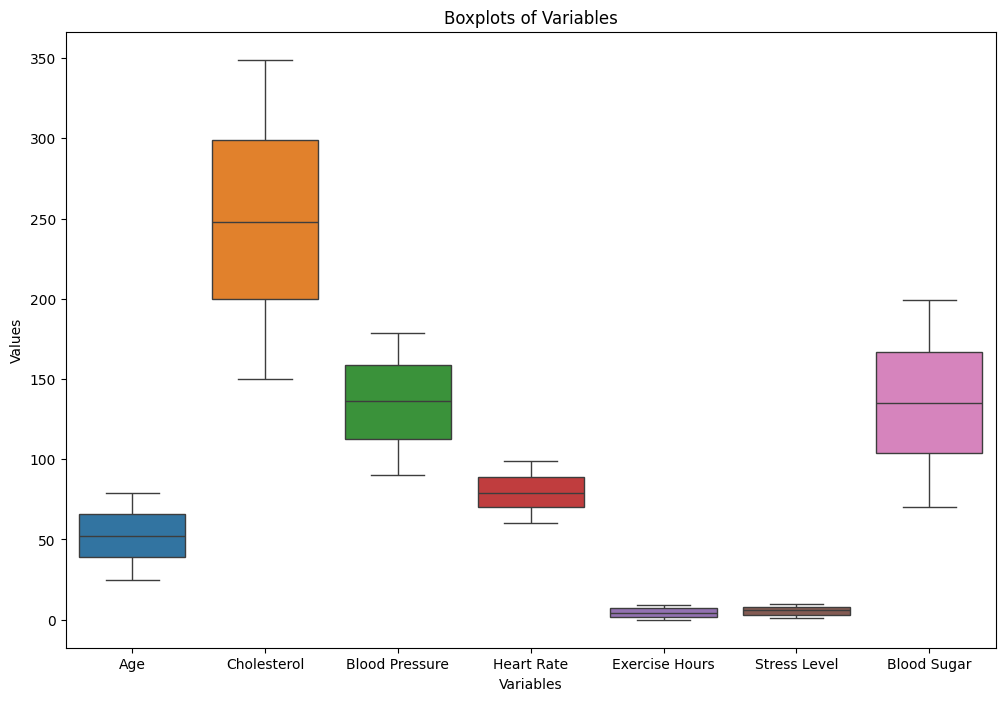

In [13]:
#Memeriksa outlier pada fitur selain kategorikal, yaitu fitur 'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar'

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']])

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [14]:
# Pisahkan fitur dan target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

#Melakukan scalling dengan menggunakan metode MinMax Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.92592593, 0.        , 0.3919598 , ..., 0.37984496, 1.        ,
        0.33333333],
       [0.42592593, 1.        , 0.27135678, ..., 0.        , 1.        ,
        1.        ],
       [0.51851852, 1.        , 0.42211055, ..., 0.97674419, 1.        ,
        0.33333333],
       ...,
       [1.        , 1.        , 0.00502513, ..., 0.92248062, 1.        ,
        0.        ],
       [0.64814815, 0.        , 0.88442211, ..., 0.80620155, 1.        ,
        0.33333333],
       [0.51851852, 1.        , 0.38190955, ..., 0.70542636, 1.        ,
        0.        ]])

setelah itu kita akan menggunakan metode minmax scaler untuk melakukan scaling. scaling dilakukan dengan tujuan untuk menyamaratakan nilai pada dataset agar selisih dari setiap data tidak terlalu jauh.

In [15]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
0,0.925926,0.0,0.391960,0.325843,0.153846,0.0,0.0,0.111111,0.0,0.0,1.0,0.777778,0.379845,1.0,0.333333
1,0.425926,1.0,0.271357,0.842697,0.051282,0.0,1.0,0.555556,0.0,0.0,0.0,0.888889,0.000000,1.0,1.000000
2,0.518519,1.0,0.422111,0.011236,0.179487,1.0,0.0,0.333333,1.0,0.0,1.0,0.444444,0.976744,1.0,0.333333
3,0.814815,0.0,0.211055,0.000000,0.307692,0.0,1.0,0.444444,0.0,1.0,0.0,0.666667,0.286822,1.0,0.666667
4,0.685185,0.0,0.110553,0.820225,0.846154,1.0,1.0,0.666667,0.0,1.0,0.0,0.111111,0.875969,1.0,0.000000


DataFrame di atas merupakan hasil dari transformasi minmax scaling pada setiap atribut/fitur pada dataset heart disease.

In [16]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape

((800, 15), (200, 15))

In [18]:
y_train.shape, y_test.shape

((800,), (200,))

# Pemodelan

#### Support Vector Machine (SVM)

In [19]:
# Inisialisasi model SVM
svm_model = SVC(random_state=42)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Memprediksi pada data test
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model SVM
print("SVM Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nAccuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Evaluation:
Confusion Matrix:
 [[115   3]
 [ 11  71]]

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       118
           1       0.96      0.87      0.91        82

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200



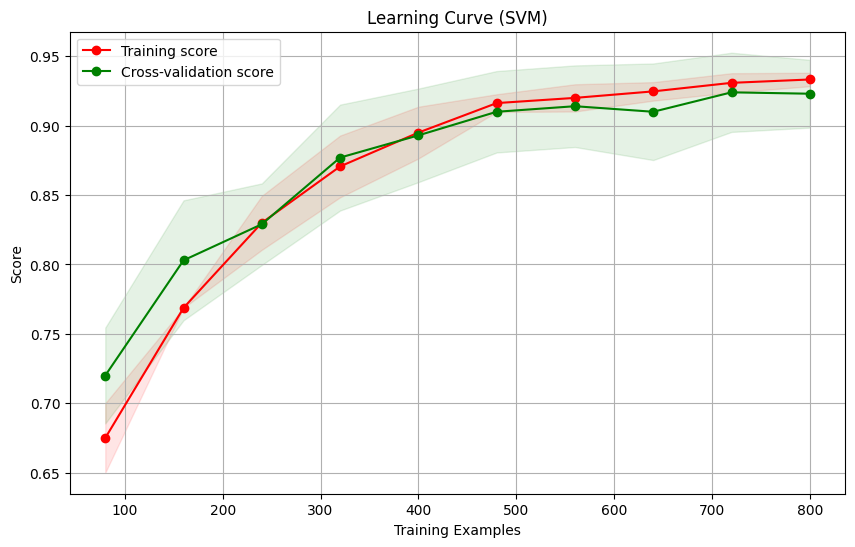

In [20]:
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (SVM)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


#### Logistic Regression (LR)

In [21]:
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increase max_iter if convergence warnings occur

# Melatih model Logistic Regression
lr_model.fit(X_train, y_train)

# Memprediksi pada data test
y_pred_lr = lr_model.predict(X_test)

# Evaluasi model Logistic Regression
print("Logistic Regression Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Model Evaluation:
Confusion Matrix:
 [[105  13]
 [ 15  67]]

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       118
           1       0.84      0.82      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200



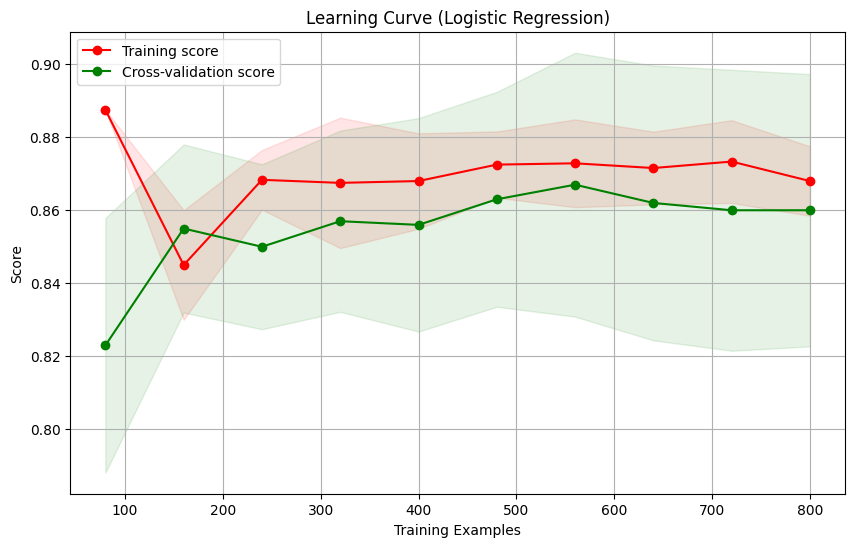

In [22]:
#earning curve data for Logistic Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    lr_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)

# Plot learning curve for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes_lr, train_scores_mean_lr - train_scores_std_lr,
                 train_scores_mean_lr + train_scores_std_lr, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_lr, test_scores_mean_lr - test_scores_std_lr,
                 test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color="g")
plt.plot(train_sizes_lr, train_scores_mean_lr, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_lr, test_scores_mean_lr, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#### K-Nearest Neighbour (KNN)

In [23]:
# Inisialisasi model KNN
# Anda bisa mencoba beberapa nilai k (jumlah tetangga terdekat)
knn_model = KNeighborsClassifier(n_neighbors=5) # Contoh menggunakan k=5

# Melatih model KNN
knn_model.fit(X_train, y_train)

# Memprediksi pada data test
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model KNN
print("KNN Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nAccuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Model Evaluation:
Confusion Matrix:
 [[106  12]
 [ 13  69]]

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       118
           1       0.85      0.84      0.85        82

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200



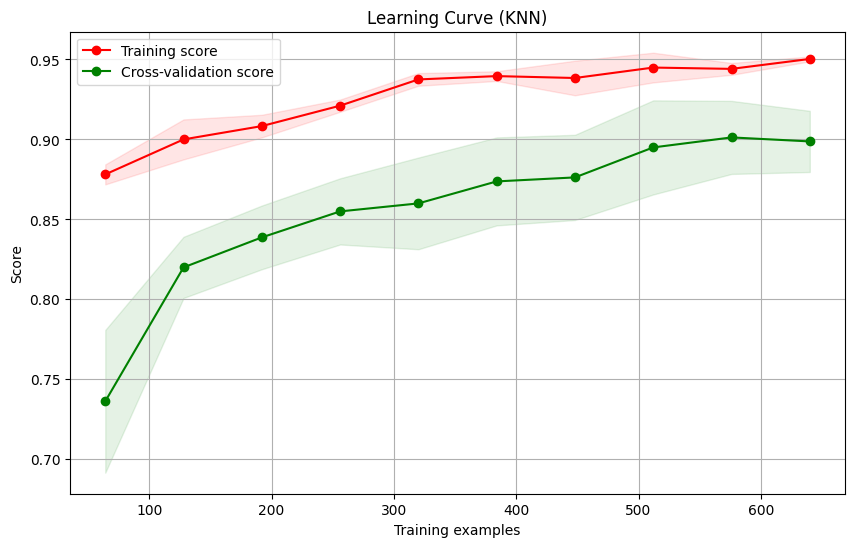

In [24]:
# learning curves for KNN
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    knn_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and testing scores for KNN
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)
test_scores_std_knn = np.std(test_scores_knn, axis=1)

# Plot learning curves for KNN
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn,
                 train_scores_mean_knn + train_scores_std_knn, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn, test_scores_mean_knn - test_scores_std_knn,
                 test_scores_mean_knn + test_scores_std_knn, alpha=0.1, color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (KNN)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [25]:
#Membandingkan hasil akurasi dari 3 pemodelan
results = {
    'Model': ['Logistic Regression', 'SVM', 'KNN'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn)]
}

results_df = pd.DataFrame(results)

print("Perbandingan Akurasi Model LR, SVM, dan KNN:")
results_df

Perbandingan Akurasi Model LR, SVM, dan KNN:


,Model,Accuracy
0,Logistic Regression,0.860
1,SVM,0.930
2,KNN,0.875


Dari tabel di atas didapatkan model SVM memiliki nilai akurasi yang lebih tinggi daripada model Logistic Regression dan KNN. Setelah itu akan dilakukan optimalisasi model menggunakan hyperparameter tuning GridSearch untuk mendapatkan nilai parameter dan akurasi yang paling optimal dari model SVM

# Optimalisasi Model

In [26]:
#Optimalisasi dengan cara hyperparameter tuning pada model terbaik menggunakan GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient
    'kernel': ['rbf', 'linear']     # Specifies the kernel type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters found by GridSearchCV:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_svm = best_svm_model.predict(X_test)

print("\nOptimized SVM Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_svm))
print("\nAccuracy:", accuracy_score(y_test, y_pred_best_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_svm))

# Compare the accuracy of the optimized SVM with previous models
results = {
    'Model': ['Logistic Regression', 'SVM (Initial)', 'KNN', 'SVM (Optimized)'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_best_svm)]
}

results_df = pd.DataFrame(results)

print("\nPerbandingan Akurasi Model Setelah Optimalisasi SVM:")
results_df

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.

,Model,Accuracy
0,Logistic Regression,0.860
1,SVM (Initial),0.930
2,KNN,0.875
3,SVM (Optimized),0.920


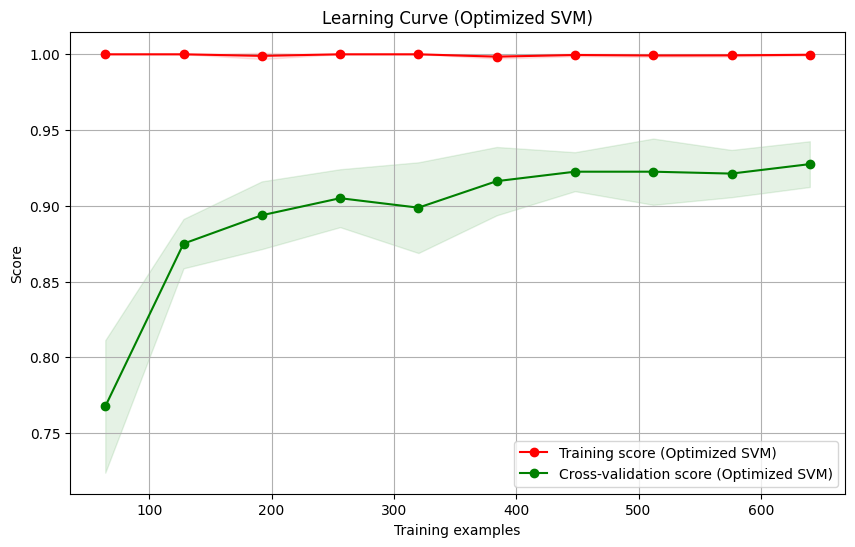

In [27]:
# Generate learning curves for the optimized SVM model
train_sizes_opt_svm, train_scores_opt_svm, test_scores_opt_svm = learning_curve(
    best_svm_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and testing scores for optimized SVM
train_scores_mean_opt_svm = np.mean(train_scores_opt_svm, axis=1)
train_scores_std_opt_svm = np.std(train_scores_opt_svm, axis=1)
test_scores_mean_opt_svm = np.mean(test_scores_opt_svm, axis=1)
test_scores_std_opt_svm = np.std(test_scores_opt_svm, axis=1)

# Plot learning curves for optimized SVM
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_opt_svm, train_scores_mean_opt_svm - train_scores_std_opt_svm,
                 train_scores_mean_opt_svm + train_scores_std_opt_svm, alpha=0.1, color="r")
plt.fill_between(train_sizes_opt_svm, test_scores_mean_opt_svm - test_scores_std_opt_svm,
                 test_scores_mean_opt_svm + test_scores_std_opt_svm, alpha=0.1, color="g")
plt.plot(train_sizes_opt_svm, train_scores_mean_opt_svm, 'o-', color="r",
         label="Training score (Optimized SVM)")
plt.plot(train_sizes_opt_svm, test_scores_mean_opt_svm, 'o-', color="g",
         label="Cross-validation score (Optimized SVM)")

plt.title("Learning Curve (Optimized SVM)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [28]:
# menyimpan model SVM yang telah dilakukan tuning

import joblib

# Save the best performing model (optimized SVM)
model_filename = '/content/drive/MyDrive/TUGAS CODING CAMP/ML Terapan/optimized_svm_model.pkl'
joblib.dump(best_svm_model, model_filename)

print(f"Optimized SVM model saved to {model_filename}")


Optimized SVM model saved to /content/drive/MyDrive/TUGAS CODING CAMP/ML Terapan/optimized_svm_model.pkl
